Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

 -  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
    considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail that match CHAR


    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e.
average length of uninterrupted sequences of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type
`capital run length longest` i.e. length of longest uninterrupted sequence of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length total` i.e.
sum of length of uninterrupted sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)




In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Load the data  stored in `path` using `.read_csv()` api.

In [6]:
data = pd.read_csv('../data/email_data.csv', header=None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
data.shape

(4601, 58)

In [9]:
data.rename(columns={57:'spam'}, inplace=True)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Get an overview of your data by using info() and describe() functions of pandas.



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Split the data into train and test set and fit the base logistic regression model on train set.

In [13]:
# Split the data into X and y

X = data.drop('spam', axis=1)
y = data['spam']

In [14]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

print(X_train.shape[0])
print(X_test.shape[0])

3680
921


### Find out the accuracy , print out the Classification report and Confusion Matrix.

In [15]:
# Instantiate Logistic Regression

lr = LogisticRegression()

In [16]:
# Train the model and check the predictions

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
y_pred_prob = lr.predict_proba(X_test)

In [18]:
y_pred_prob = [p[1] for p in y_pred_prob]

In [19]:
y_pred_30 = [1 if i >= 0.7 else 0 for i in y_pred_prob]
y_pred_20 = [1 if i >= 0.8 else 0 for i in y_pred_prob]
y_pred_10 = [1 if i >= 0.9 else 0 for i in y_pred_prob]

In [20]:
# Print Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       559
           1       0.91      0.91      0.91       362

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [21]:
# Print Classification Report

print(classification_report(y_test, y_pred_30))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       559
           1       0.93      0.81      0.87       362

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



In [22]:
# Print Classification Report

print(classification_report(y_test, y_pred_20))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       559
           1       0.95      0.75      0.83       362

    accuracy                           0.88       921
   macro avg       0.90      0.86      0.87       921
weighted avg       0.89      0.88      0.88       921



In [23]:
# Print Classification Report

print(classification_report(y_test, y_pred_10))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       559
           1       0.96      0.60      0.74       362

    accuracy                           0.83       921
   macro avg       0.88      0.79      0.81       921
weighted avg       0.86      0.83      0.83       921



 - TP = predictied 1 and actual 1
 - FP = predicted 1 and actual 0 (Type 1 errors)
 - TN = predicted 0 and actual 0
 - FN = predicted 0 and actual 1 (Type 2 errors)


 - Precision = TP/(TP + FP)
 - Recall = TP/(TP + FN)

###  Copy dataset df into df1 variable and apply correlation on df1

### As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity), So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [24]:
# Make a copy of the data

data2 = data.copy()

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

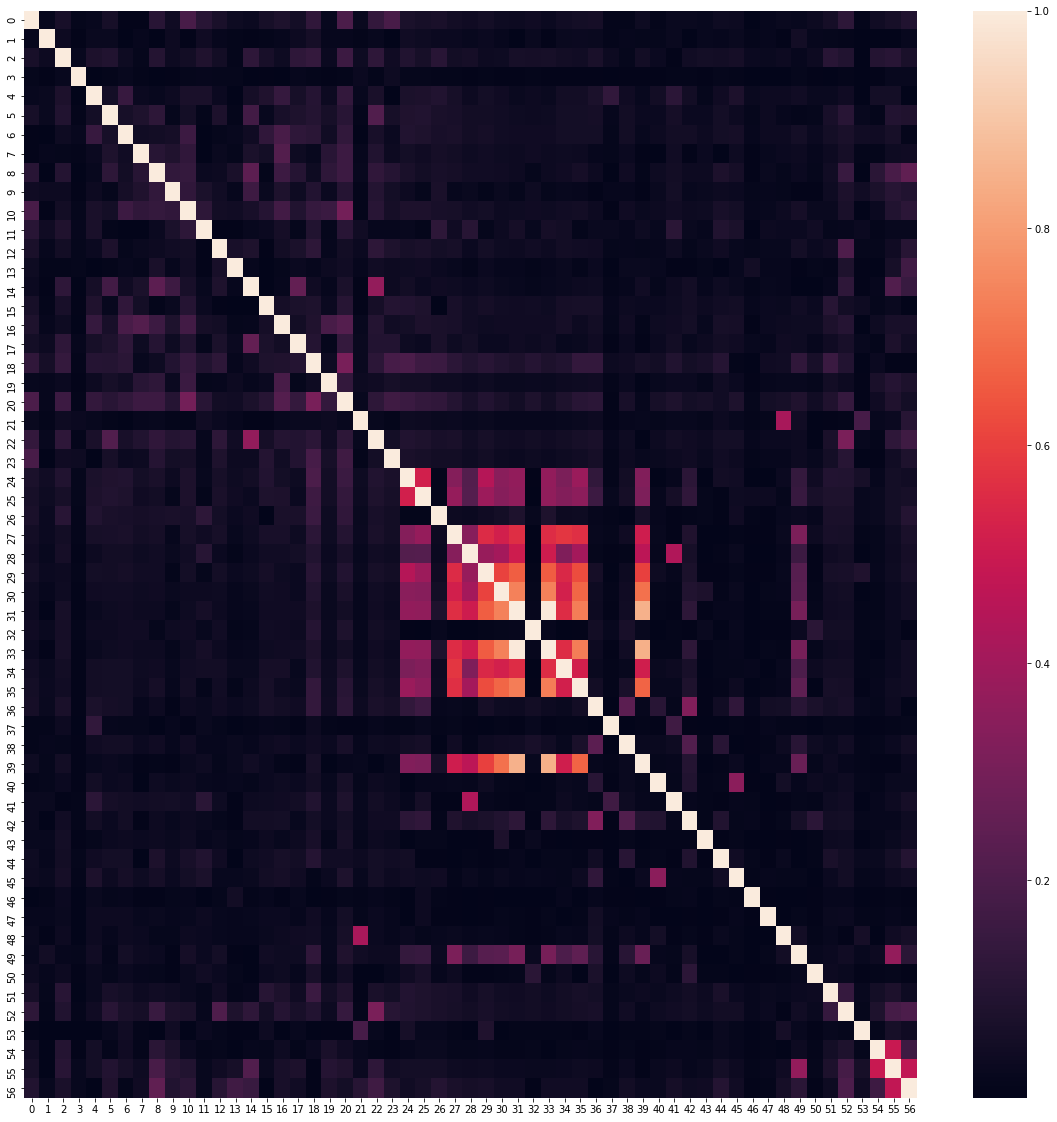

In [26]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().abs())
plt.show()

In [27]:
# Create X2 and y2 from data2

X2 = data2.drop('spam', axis=1)
y2 = data2['spam']

In [28]:
# Remove Correlated features above 0.75 and then apply logistic model
corr_matrix = X2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print("Columns to be dropped: ")
print(to_drop)
X2.drop(to_drop,axis=1,inplace=True)

Columns to be dropped: 
[31, 33, 35, 39]


In [29]:
X2.shape

(4601, 53)

### Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.8, random_state=10)

###  Find out the accuracy , print out the Classification report and Confusion Matrix.

In [31]:
lr.fit(X_train2, y_train2)
y_pred2 = lr.predict(X_test2)

In [32]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       559
           1       0.90      0.92      0.91       362

    accuracy                           0.93       921
   macro avg       0.92      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [33]:
# Testing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train2, y_train2)
y_pred_rf = rf.predict(X_test2)

print(classification_report(y_test2, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       559
           1       0.97      0.94      0.95       362

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [36]:
rf.fit(X_train, y_train)
y_pred_orig_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_orig_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       559
           1       0.97      0.95      0.96       362

    accuracy                           0.97       921
   macro avg       0.97      0.97      0.97       921
weighted avg       0.97      0.97      0.97       921



###  After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test) to see whether we can increase our score. Find the optimum number of features using Chi Square and fit the logistic model on train data.



In [37]:
nof_list=[20,25,30,35,40,50,53]
high_score=0
nof=0

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state = 10)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = LogisticRegression(random_state=101)
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9077090119435396
For no of features= 25 , score= 0.9185667752442996
For no of features= 30 , score= 0.9239956568946797
For no of features= 35 , score= 0.9250814332247557
For no of features= 40 , score= 0.9261672095548317
For no of features= 50 , score= 0.9261672095548317
For no of features= 53 , score= 0.9283387622149837
High Score is: 0.9283387622149837 with features= 53


In [38]:
nof_list=[20,25,30,35,40,50,53]
high_score=0
nof=0

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state = 10)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9587404994571118
For no of features= 25 , score= 0.9576547231270358
For no of features= 30 , score= 0.9609120521172638
For no of features= 35 , score= 0.9609120521172638
For no of features= 40 , score= 0.9652551574375678
For no of features= 50 , score= 0.9609120521172638
For no of features= 53 , score= 0.9663409337676439
High Score is: 0.9663409337676439 with features= 53


###  Find out the accuracy , print out the Confusion Matrix.



### Using chi squared test there is no change in the score and the optimum features that we got is 55. Now lets see if we can increase our score using another feature selection technique called Anova.Find the optimum number of features using Anova and fit the logistic model on train data.

### Find out the accuracy , print out the Confusion Matrix.



In [39]:
nof_list=[20,25,30,35,40,50,53]
high_score=0
nof=0

for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state = 10)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = LogisticRegression(random_state=101)
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9055374592833876
For no of features= 25 , score= 0.9055374592833876
For no of features= 30 , score= 0.9185667752442996
For no of features= 35 , score= 0.9174809989142236
For no of features= 40 , score= 0.9272529858849077
For no of features= 50 , score= 0.9294245385450597
For no of features= 53 , score= 0.9283387622149837
High Score is: 0.9294245385450597 with features= 50


In [40]:
nof_list=[20,25,30,35,40,50,53]
high_score=0
nof=0

for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state = 10)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

For no of features= 20 , score= 0.9522258414766558
For no of features= 25 , score= 0.9554831704668838
For no of features= 30 , score= 0.9685124864277959
For no of features= 35 , score= 0.9652551574375678
For no of features= 40 , score= 0.9652551574375678
For no of features= 50 , score= 0.9652551574375678
For no of features= 53 , score= 0.9619978284473398
High Score is: 0.9685124864277959 with features= 30


###  You can also compare your predicted values and observed values by printing out values of X_test and Y_test values for best combination

In [44]:
test = SelectKBest(score_func=f_classif , k= 30 )
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2,random_state = 10)
X_train = test.fit_transform(X_train,y_train)
X_test = test.transform(X_test)
    
model = RandomForestClassifier()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
    
print("Best Score is:",score, "with features=30")

Best Score is: 0.9609120521172638 with features=30


In [48]:
# Compare observed value and Predicted value
print("Prediction for 10 observation:    ",model.predict(X_test[0:10]))
print("Actual values for 10 observation: ",y_test[0:10].values)


Prediction for 10 observation:     [1 1 0 0 0 0 1 1 0 0]
Actual values for 10 observation:  [1 1 0 0 0 0 1 1 0 0]
